In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../code/')

from bycycle import features
from bycycle import cyclepoints
from bycycle.plts import plot_burst_detect_summary, plot_cyclepoints_array
from bycycle.cyclepoints import find_extrema, find_zerox
from neurodsp.filt import filter_signal

import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole



from utils import inference
from utils.simulation_wrapper import (
    simulation_wrapper,
    simulation_wrapper_obs,

)
import torch

import matplotlib.pyplot as plt



from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference import SNPE_C, prepare_for_sbi, simulate_for_sbi

In [18]:


sim_wrapper = simulation_wrapper_obs
prior_min = [7.9, 43.8] 

prior_max = [30, 79.9]

true_params = torch.tensor([[26.61, 63.53]])

prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

theta, x_without = inference.run_sim_theta_x(
        prior, 
        simulation_wrapper=sim_wrapper, 
        num_simulations=8, 
        num_workers=8
    )

2
params size torch.Size([2, 2])
2 params are investigated
joblib will run over 1 jobs
2
params size torch.Size([2])
2 params are investigated
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...


Running 8 simulations in 8 batches.:   0%|          | 0/8 [00:00<?, ?it/s]

[530]
2100


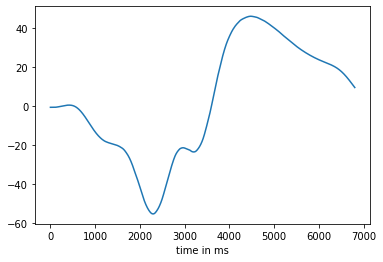

In [28]:
import numpy as np

x_without[0]

xi = np.arange(len(x_without[0]))

plt.plot(xi, x_without[0])

plt.xlabel('time in ms')


print(np.argwhere(np.diff(np.sign(x_without[0])))[1])

print(70*30)

In [81]:
amp_frac.shape

torch.Size([1, 1373])

In [123]:
fs = 1000
f_range = (2, 100)

threshold_kwargs = {'amp_fraction_threshold': 0.1,
                    'amp_consistency_threshold': .5,
                    'period_consistency_threshold': .45,
                    'monotonicity_threshold': .7,
                    'min_n_cycles': 0,
                   #'max_n_cycles': 5
                   }

df_features = features.compute_features(x_without[0], fs, f_range, threshold_kwargs=threshold_kwargs)
    

    
df_features


,amp_fraction,amp_consistency,period_consistency,monotonicity,period,time_peak,time_trough,volt_peak,volt_trough,time_decay,...,time_rdsym,time_ptsym,band_amp,sample_peak,sample_last_zerox_decay,sample_zerox_decay,sample_zerox_rise,sample_last_trough,sample_next_trough,is_burst
0,0.666667,NaN,NaN,1.000000,919,494,103,5.068566,1.870764,653,...,0.289445,0.827471,NaN,395,129,726,232,129,1048,False
1,0.083333,-0.036482,0.159956,0.445205,147,52,417,-10.936421,-11.427473,1,...,0.993197,0.110874,NaN,1194,726,1195,1143,1048,1195,False
2,0.500000,-0.036482,0.318182,0.782051,462,351,11,-10.847713,-10.933299,306,...,0.337662,0.969613,NaN,1351,1195,1557,1206,1195,1657,False
3,0.750000,-0.005228,0.559889,0.500000,359,132,101,-26.008766,-25.929914,358,...,0.002786,0.566524,NaN,1658,1557,1790,1658,1657,2016,False
4,0.416667,-0.008331,0.344178,0.500000,201,68,359,-39.594105,-48.123508,1,...,0.995025,0.159251,NaN,2216,1790,2217,2149,2016,2217,False
5,0.833333,-0.003995,0.136986,1.000000,584,360,117,-21.737106,-39.523048,260,...,0.554795,0.754717,NaN,2541,2217,2694,2334,2217,2801,False
6,0.166667,-0.017731,0.120664,0.500000,80,28,108,-28.251055,-28.234234,79,...,0.012500,0.205882,NaN,2802,2694,2830,2802,2801,2881,False
7,1.000000,-0.003395,0.120664,0.500000,663,304,410,23.639877,-29.199730,1,...,0.998492,0.425770,NaN,3543,2830,3544,3240,2881,3544,False
8,0.583333,-0.009779,0.243269,0.500000,515,315,200,39.047291,23.692013,1,...,0.998058,0.611650,NaN,4058,3544,4059,3744,3544,4059,False
9,0.916667,-0.009779,0.077940,1.000000,2117,827,60,40.610241,39.062428,1934,...,0.086443,0.932356,NaN,4242,4059,4946,4119,4059,6176,False


In [88]:
amp_tensor = torch.tensor(amp_frac_list)

NameError: name 'amp_frac_list' is not defined

In [89]:
print(amp_tensor)

NameError: name 'amp_tensor' is not defined

In [90]:

df_features

print(len(amp_frac_list))

NameError: name 'amp_frac_list' is not defined

In [91]:
posterior = inference.run_only_inference(theta, amp_tensor, prior)

NameError: name 'amp_tensor' is not defined

/home/ubuntu/miniconda3/lib/python3.9/site-packages/neurodsp/filt/checks.py:162: UserWarning: The low or high frequency stopband never gets attenuated bymore than 20 dB. Increase filter length.
  warn('The low or high frequency stopband never gets attenuated by'\


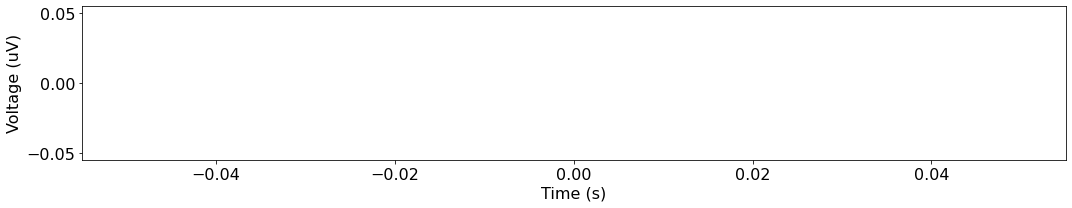

In [156]:
# Find peaks and troughs (this function also does the above)
fs = 5000
f_range = (1, 30)

n_seconds_filter = .1
peaks, troughs = cyclepoints.extrema.find_extrema(x_without[0], fs, f_range,
                             filter_kwargs={'n_seconds':n_seconds_theta}
                                                 )

rises, decays = find_zerox(x_without[0], peaks, troughs)

plot_cyclepoints_array(x_without[0], fs, xlim=(13, 14), peaks=peaks, troughs=troughs,
                       rises=rises, decays=decays)

In [103]:
print(peaks)
print(df_features['time_peak'][0])

y_values= []
y_vals_t = []

for peak in peaks:
    y_value = x_without[0][peak]
    y_values.append(y_value)
    
for trough in troughs:
    y_val_t = x_without[0][trough]
    y_vals_t.append(y_val_t)
    

[   1   12  140  395  471  645 1283 1331 1649 2541 2592 2784 3093 3283
 3474 6482]
6


In [104]:
y_values

[tensor(0.2367),
 tensor(0.3424),
 tensor(2.0292),
 tensor(5.0686),
 tensor(4.5850),
 tensor(-0.0134),
 tensor(-10.6469),
 tensor(-10.7461),
 tensor(-25.3124),
 tensor(-21.7371),
 tensor(-22.1735),
 tensor(-27.8841),
 tensor(-18.7249),
 tensor(1.8471),
 tensor(19.4146),
 tensor(14.6039)]

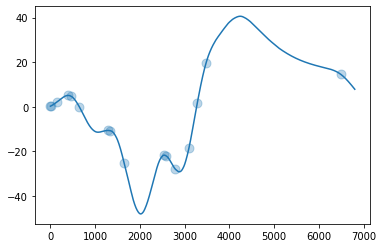

In [105]:
y = y_values


plt.scatter(peaks, list(y_values), alpha=0.3, marker='o', s=80)

#plt.scatter(troughs, list(y_vals_t), marker='o', s=20)

plt.plot(x_without[0])

In [45]:
len(y_values)

7

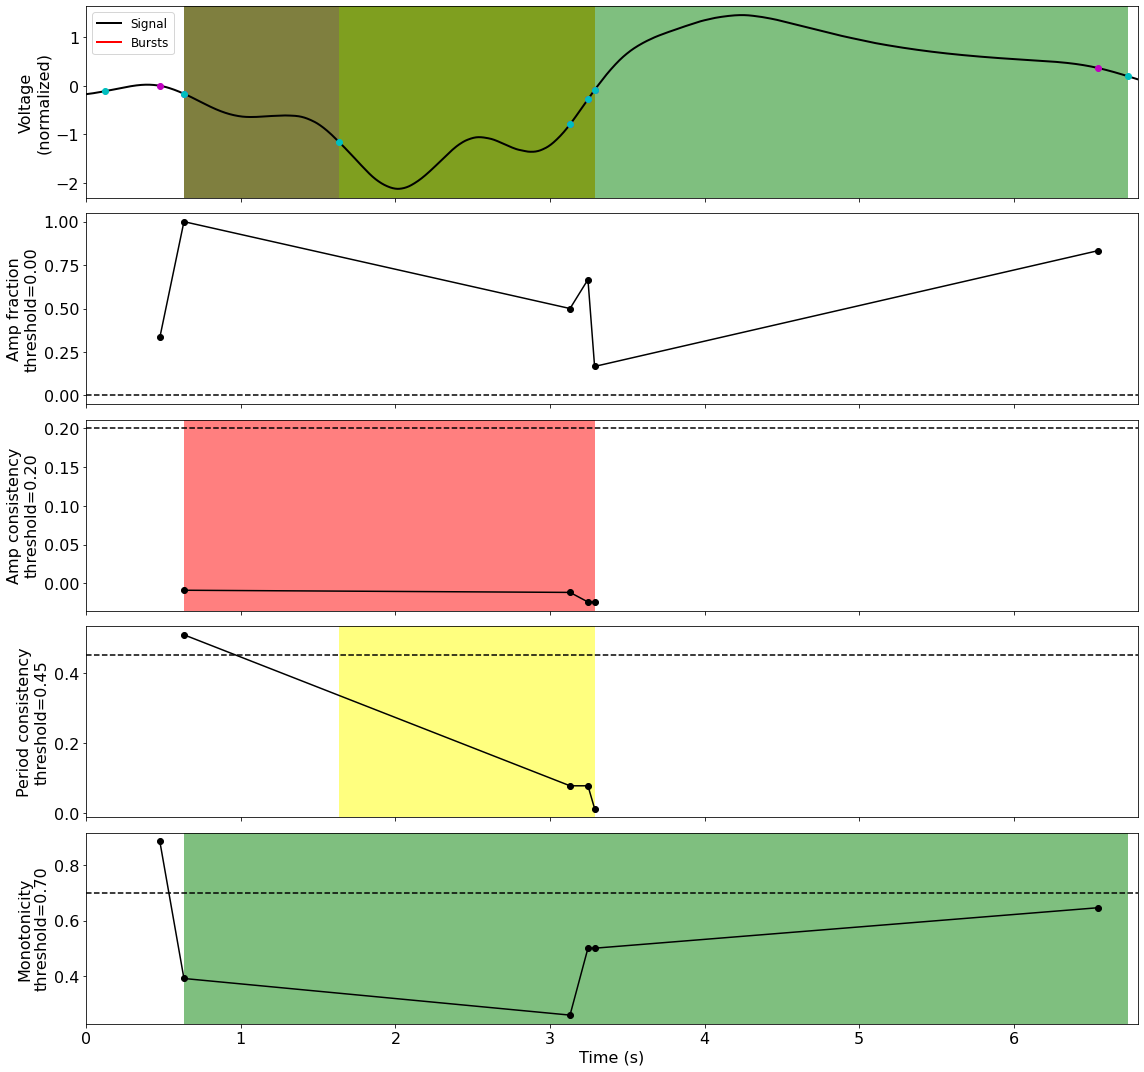

In [46]:



plot_burst_detect_summary(df_features, x_without[0], fs, threshold_kwargs, figsize=(16, 3))

plt.savefig('Burst_detect_plot')